In [1]:
#Se utilizó como guía el archivo "Ataque de Evasión y envenamiento.ipynnb" solamente que 
# implementado a nuestro modelo de lab 6
#Credits: Ataque de Evasión y envenamiento.ipynnb

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from sklearn.model_selection import train_test_split

from art.estimators.classification import KerasClassifier #No soporta TF 2

from art.attacks.evasion import FastGradientMethod
from art.utils import load_dataset
import numpy as np
import matplotlib.pyplot as plt
tf.compat.v1.disable_eager_execution()
import os


c:\Users\hugo_\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image = tf.keras.utils
data_path = 'malimg_dataset/malimg_paper_dataset_imgs/'
families = os.listdir(data_path)

def load_images_and_labels(data_path, families):
    images = []
    labels = []
    for label, family in enumerate(families):
        family_path = os.path.join(data_path, family)
        if os.path.isdir(family_path):
            for img_name in os.listdir(family_path):
                img_path = os.path.join(family_path, img_name)
                img = image.load_img(img_path, target_size=(64, 64))
                img_array = image.img_to_array(img)
                images.append(img_array)
                labels.append(label)
    return np.array(images), np.array(labels)

# Cargar imágenes y etiquetas
X, y = load_images_and_labels(data_path, families)

# Dividir el dataset en entrenamiento y prueba (70% - 30%)
train_images, train_labels, test_images, test_labels = train_test_split(X,y,test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Evasion

In [3]:
load_model = tf.keras.models.load_model("malwareImg")

In [4]:
clasificador = KerasClassifier(load_model)

In [13]:
attack_fgm = FastGradientMethod(
    estimator=clasificador, 
    eps=0.5
    )

In [15]:

x_train = train_labels
test_images_adv = attack_fgm.generate(x=x_train)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


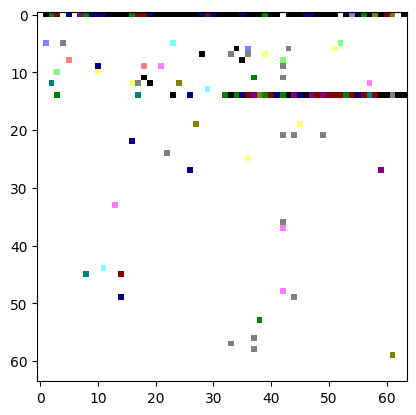

In [7]:
plt.imshow(X=test_images_adv[0])

In [16]:
y = test_labels
score_clean = load_model.evaluate(
    x=x_train, 
    y=y
    )

score_adv = load_model.evaluate(
    x=test_images_adv, 
    y=y
    )

print(f"Clean test set loss: {score_clean[0]:.2f} " 
      f"vs adversarial set test loss: {score_adv[0]:.2f}")

print(f"Clean test set accuracy: {score_clean[1]:.2f} " 
      f"vs adversarial test set accuracy: {score_adv[1]:.2f}")


Clean test set loss: 0.23 vs adversarial set test loss: 0.27
Clean test set accuracy: 0.94 vs adversarial test set accuracy: 0.91


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

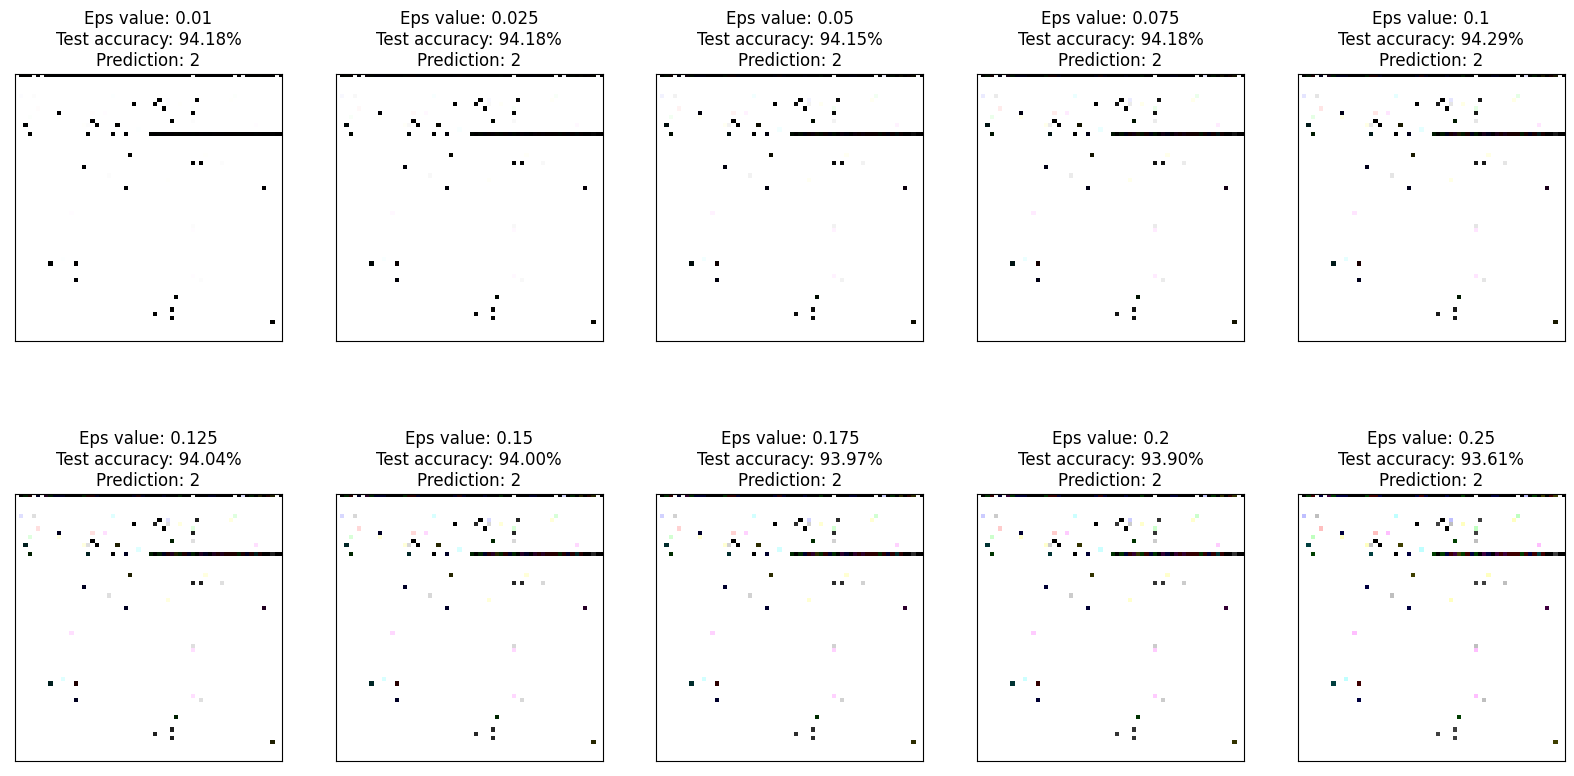

In [9]:

nrows, ncols = 2, 5

fig, axes = plt.subplots(
    nrows=nrows, 
    ncols=ncols, 
    figsize=(20, 10)
    )

eps_to_try = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25]

counter = 0

for i in range(nrows):
    for j in range(ncols):    
        attack_fgsm = FastGradientMethod(
            estimator=clasificador, 
            eps=eps_to_try[counter]
            )

        test_images_adv = attack_fgsm.generate(x=x_train)

        axes[i, j].imshow(X=test_images_adv[0])

        axes[i, j].set_xticks(ticks=[])
        axes[i, j].set_yticks(ticks=[])

        test_score = clasificador._model.evaluate(
            x=test_images_adv, 
            y=y
            )[1]

        prediction = np.argmax(load_model.predict(
            x=np.expand_dims(a=test_images_adv[0], 
            axis=0)
            ))    

        axes[i, j].set_title(
            label=f"Eps value: {eps_to_try[counter]}\n"
            f"Test accuracy: {test_score * 100:.2f}%\n"
            f"Prediction: {prediction}"
            )
        counter += 1

plt.show()

Se realizó un ataque de evasión para el modelo del laboratorio 6, entonces se recibe un ejemplo de un imagen adversaria, una entrada modificada que se percibe de una manera muy similar de su copia que no fue manipulada. Se realizó un ataque basado en gradientes, por lo que si se tiene el conocimiento de los gradientes, entonces se podrán crear nuevos conjuntos de ejmplos. De tal manera, se escogió este ataque para poder engañar al modelo y determinar que tan preciso puede ser.

Al observar y analizar los resultados, se puede determinar que el ataque obtuvo un acurracy alta de 0.91 y similar al del modelo original (0.94). Por lo que con el valor de epsilon (0.5) el modelo no se confunde con imagenes perturbadas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cf1b5497-999d-407c-9261-a8b1a6121a78' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>